## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

#### Objective
To predict which customer is more likely to purchase the newly introduced travel package

### Data Dictionary

#### Customer details:

1. CustomerID: Unique customer ID
2. ProdTaken: Product taken flag
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisited: Total number of person came with customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of the trip in a year by customer
12. Passport: The customer has passport or not
13. OwnCar: Customers owns a car flag
14. NumberOfChildrenVisited: Total number of children with age less than 5 visit with customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfactory score
2. ProductPitched: Product pitched by a salesperson
3. NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
4. DurationOfPitch: Duration of the pitch by a salesman to customer


In [136]:
# Import the libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [34]:
data = pd.read_excel('Tourism.xlsx',sheet_name='Tourism',index_col='CustomerID')

In [3]:
data.head(20)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
CustomerID,,,,,,,,,,,,,,,,,,,
200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   int64  
 1   Age                      4662 non-null   float64
 2   TypeofContact            4863 non-null   object 
 3   CityTier                 4888 non-null   int64  
 4   DurationOfPitch          4637 non-null   float64
 5   Occupation               4888 non-null   object 
 6   Gender                   4888 non-null   object 
 7   NumberOfPersonVisited    4888 non-null   int64  
 8   NumberOfFollowups        4843 non-null   float64
 9   ProductPitched           4888 non-null   object 
 10  PreferredPropertyStar    4862 non-null   float64
 11  MaritalStatus            4888 non-null   object 
 12  NumberOfTrips            4748 non-null   float64
 13  Passport                 4888 non-null   int64  
 14  PitchSatisfaction

In [5]:
data.isna().sum()

ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

Null values found in Age, TypeofContact, DurationOfPitch, Number of followups, PreferredPropertyStar,NumberOfTrips, NumberOfChildrenVisited, and MonthlyIncome. Most of these can probably be replaced by the average or median but a few of them (number of trips, number of followups, number of children visited) I think would be safe to mark as 0. TypeofContact isn't continuous so I'll go with what I assume the default value is, Self Enquiry

In [35]:
for i in ['Age','DurationOfPitch','PreferredPropertyStar','MonthlyIncome']:
    data[i].fillna(data[i].median(), inplace=True)
for i in ['NumberOfFollowups','NumberOfTrips','NumberOfChildrenVisited']:
    data[i].fillna(0, inplace=True)
data['TypeofContact'].fillna('Self Enquiry', inplace=True)

In [7]:
data.isna().sum()

ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [8]:
data.nunique()

ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             7
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                13
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

- 3 Genders?

In [9]:
data['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [36]:
#Need to drop Fe Male for Female
data['Gender'].replace('Fe Male', 'Female', inplace=True)
data['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

## EDA

### Univariate Analysis

In [11]:
# Function to create countplots with percentages above the categories
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

In [12]:
# Function to create histograms and boxplots that highlight the central tendency and dispersion of each feature
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### ProdTaken

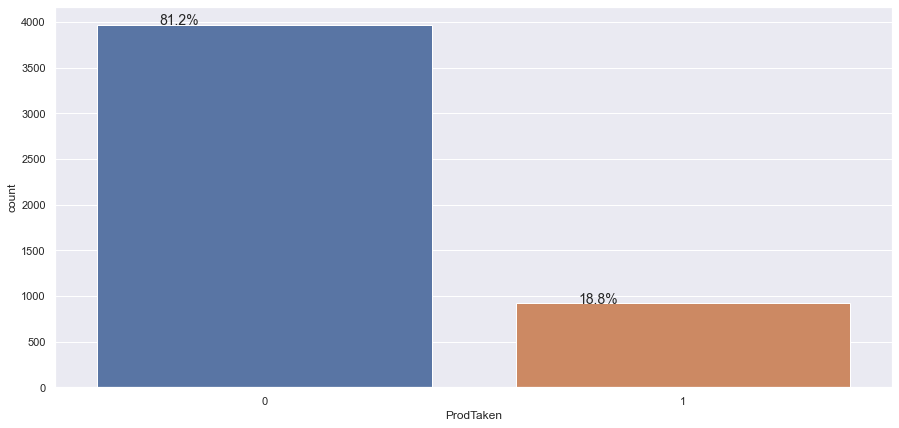

In [13]:
perc_on_bar(data['ProdTaken'])

- Less than 20% of customers took the product they were offered

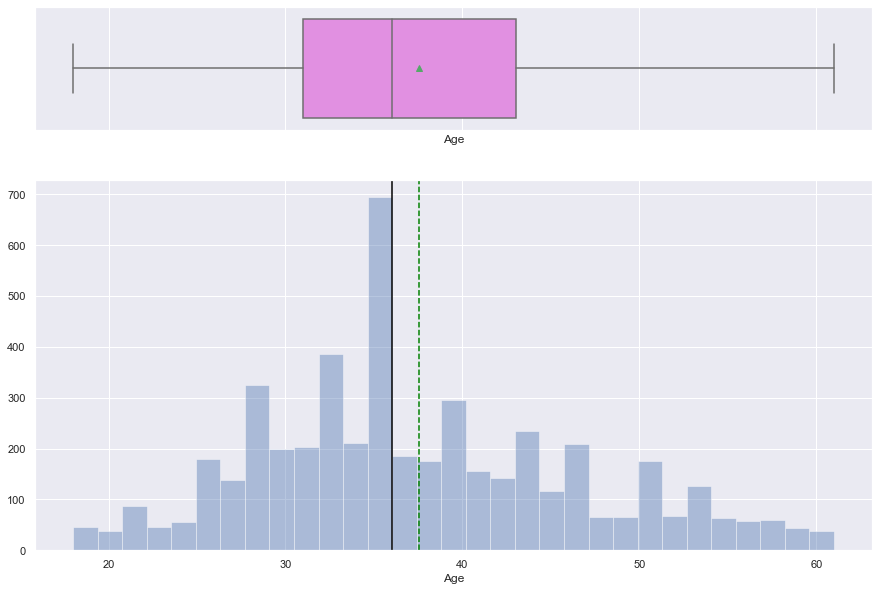

In [14]:
histogram_boxplot(data['Age'])

- Most people start traveling when they are in their late 20s, with a large spike in the mid and late 30s, possibly due to honeymoons
- Traveling slows down as people approach their 50s

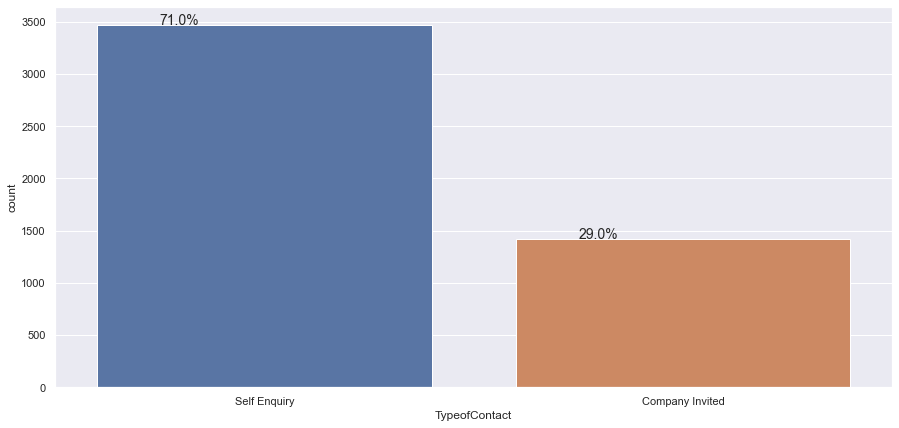

In [15]:
perc_on_bar(data['TypeofContact'])

Most customers were self enquiry

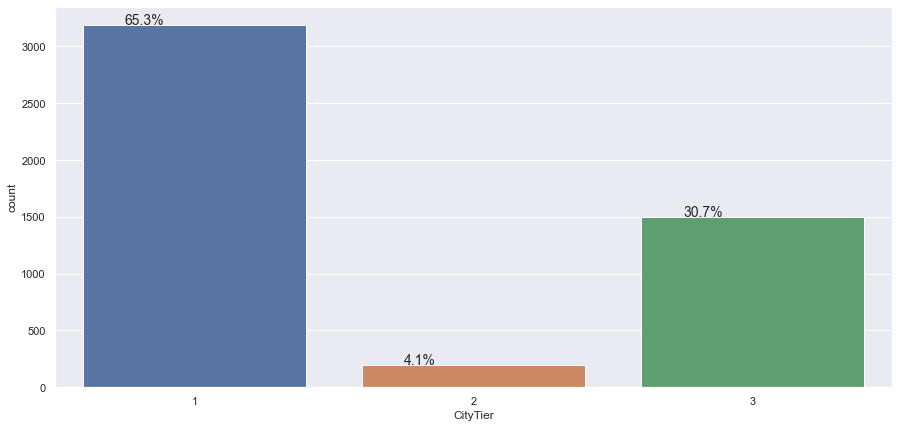

In [16]:
perc_on_bar(data['CityTier'])

- Most people who travel with us are from the highest tier of cities
- A third of our customers are people from the lower tier of cities
- Almost no one is from the middle tier

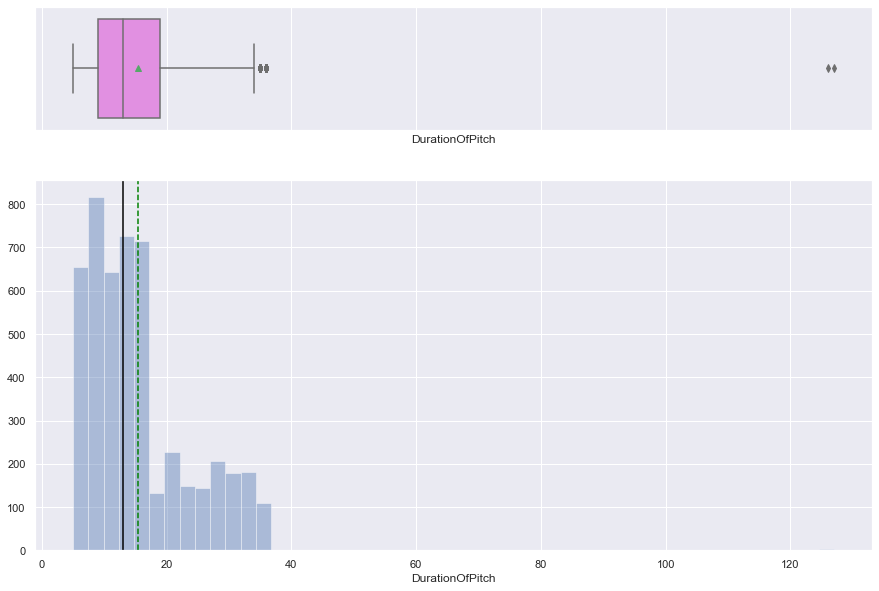

In [17]:
histogram_boxplot(data['DurationOfPitch'])

- Heavily skewed to the right, 75% of pitches last under 20 minutes and all but 2 pitches lasted under 40. Two outliers lasted more than two hours.

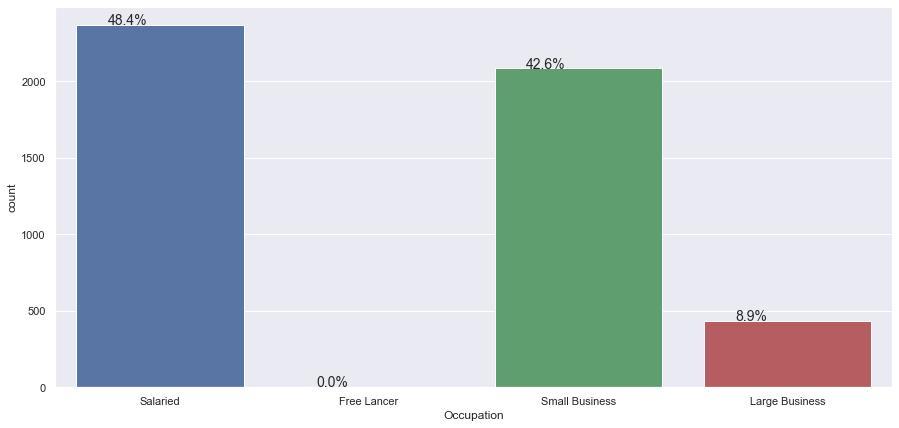

In [18]:
perc_on_bar(data['Occupation'])

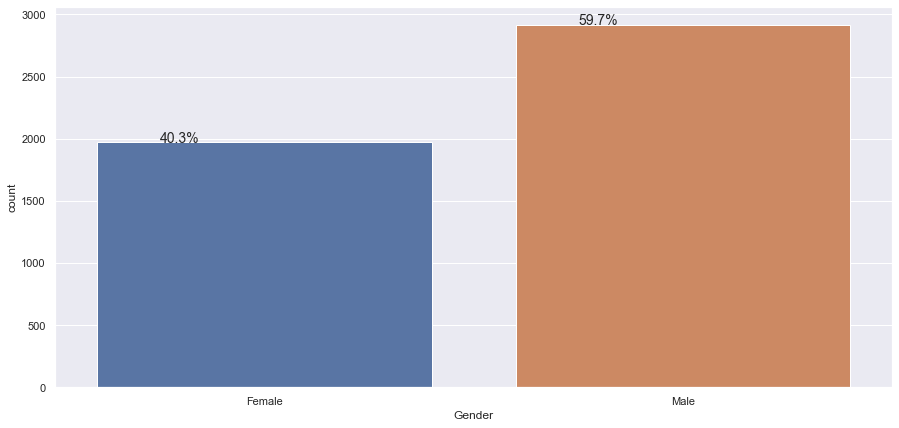

In [19]:
perc_on_bar(data['Gender'])

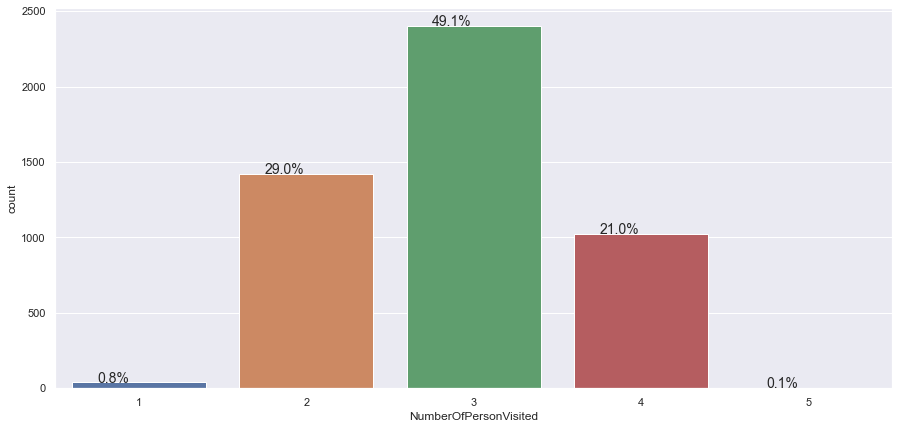

In [20]:
perc_on_bar(data['NumberOfPersonVisited'])

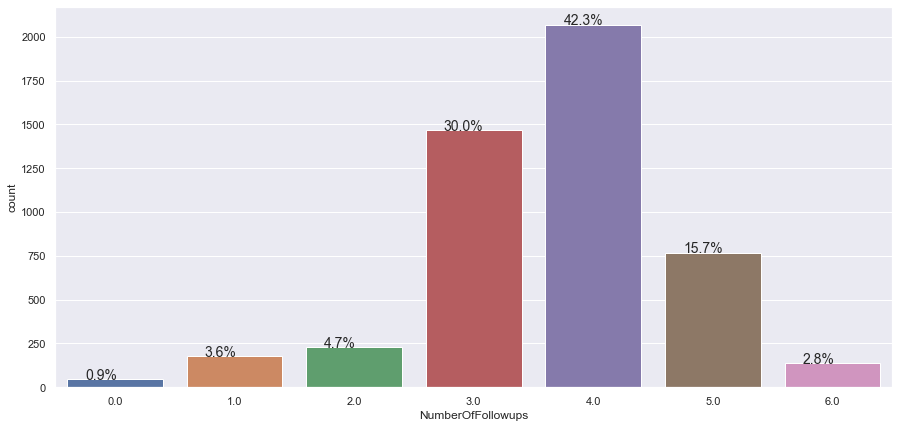

In [21]:
perc_on_bar(data['NumberOfFollowups'])

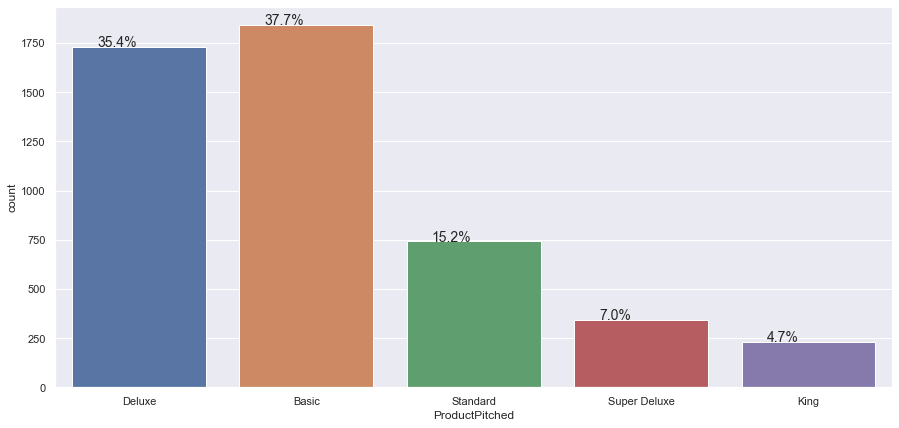

In [22]:
perc_on_bar(data['ProductPitched'])

- Salespeople have a tendency to pitch either the Basic package or the Deluxe package, with the more expensive packages probably reserved for those with higher income

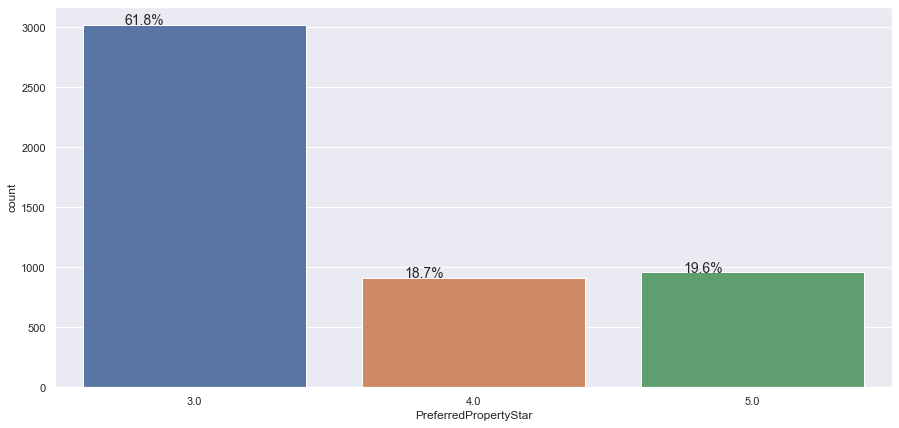

In [23]:
perc_on_bar(data['PreferredPropertyStar'])

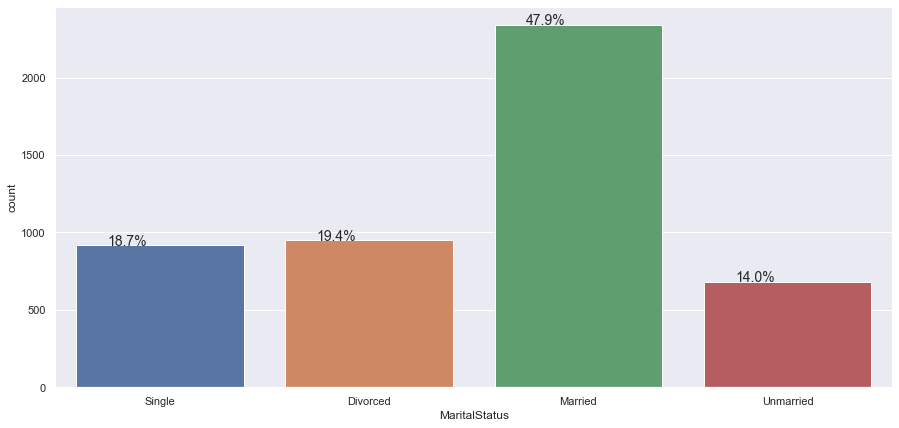

In [24]:
perc_on_bar(data['MaritalStatus'])

- Almost half of the people who travel with us are married

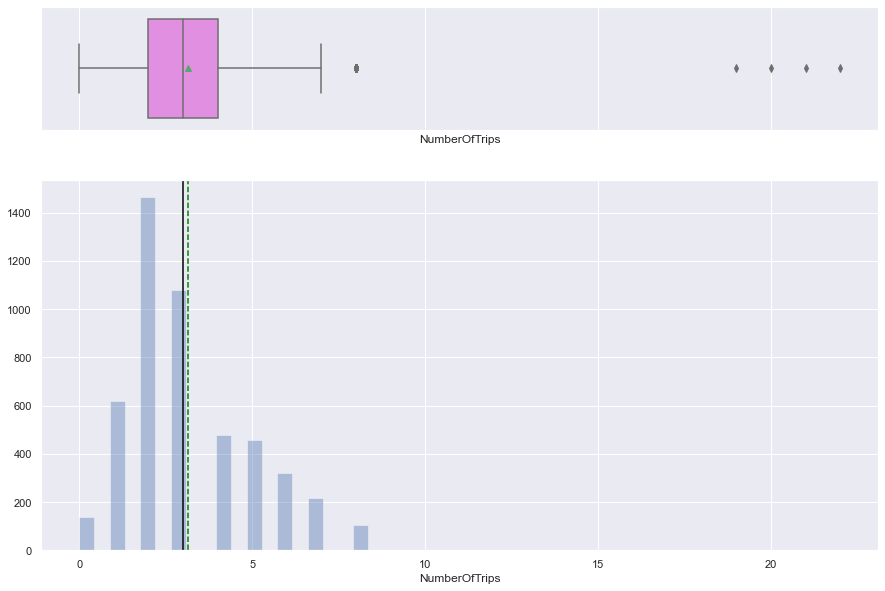

In [25]:
histogram_boxplot(data['NumberOfTrips'])

- 75% of customers take 4 trips or less in a year. Any more than that is probably traveling mostly on business

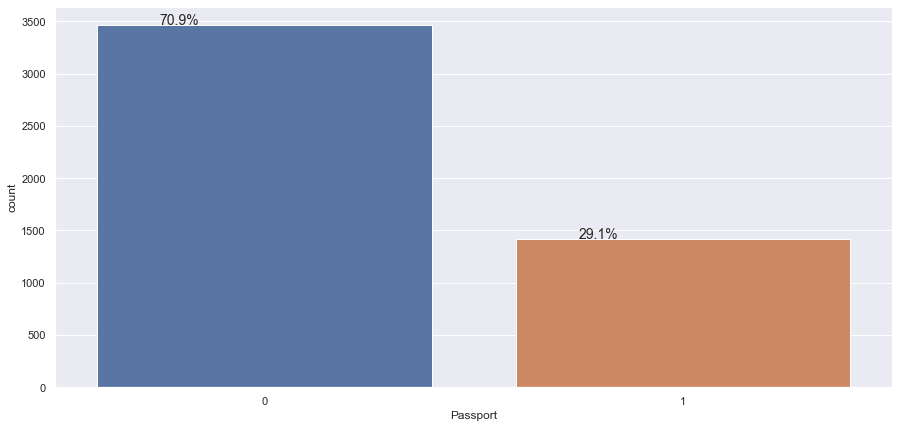

In [26]:
perc_on_bar(data['Passport'])

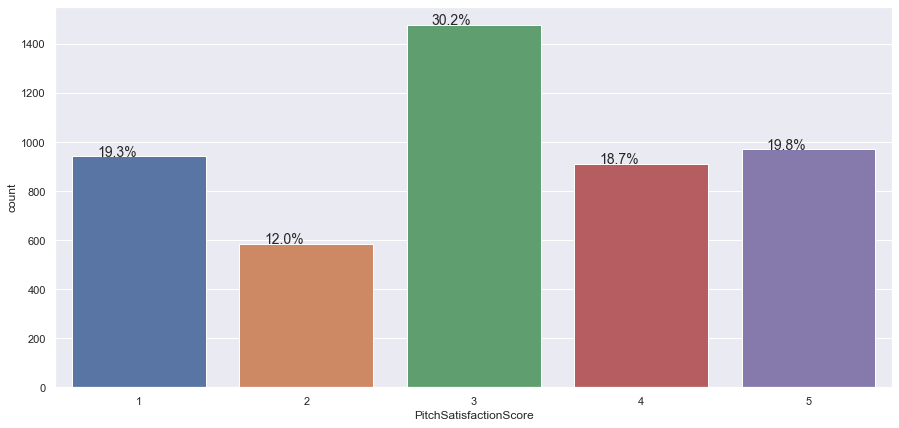

In [27]:
perc_on_bar(data['PitchSatisfactionScore'])

- More than 40% of customers were unsatisfied with the pitch they received

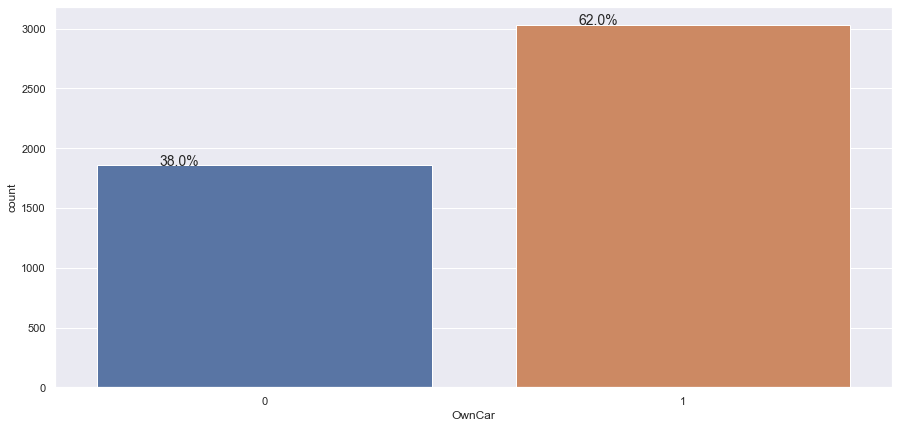

In [28]:
perc_on_bar(data['OwnCar'])

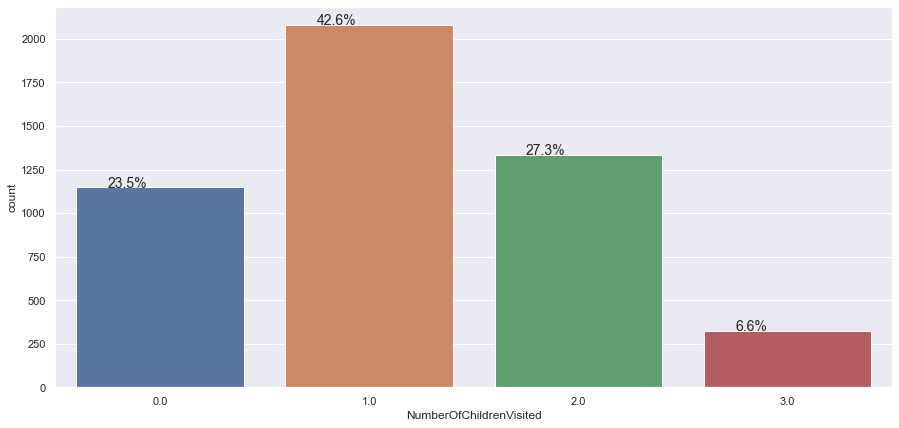

In [29]:
perc_on_bar(data['NumberOfChildrenVisited'])

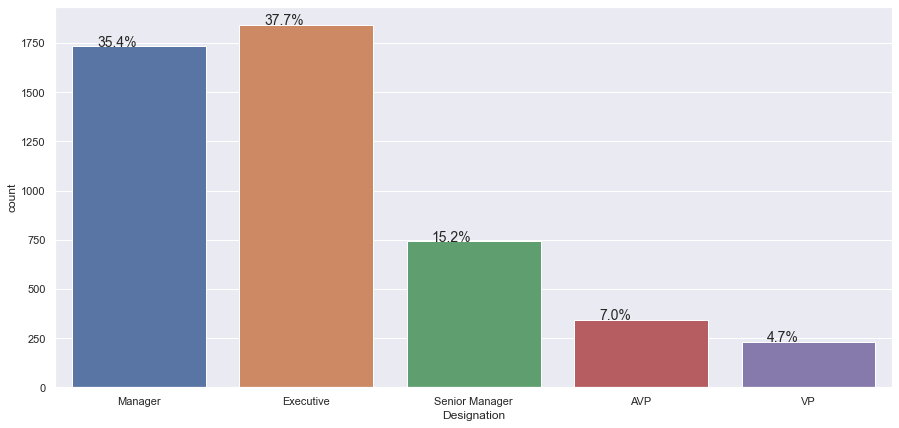

In [30]:
perc_on_bar(data['Designation'])

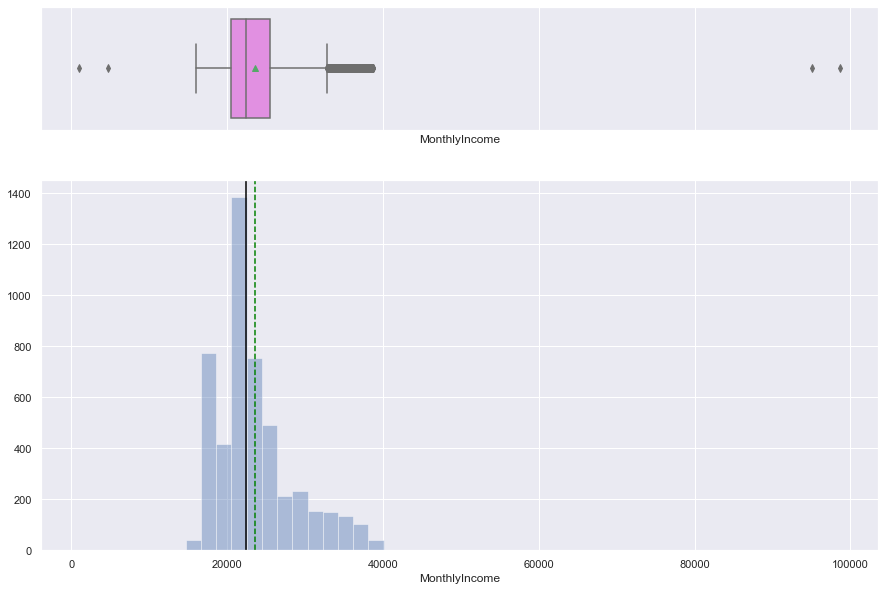

In [31]:
histogram_boxplot(data['MonthlyIncome'])

- Most customers who travel with us make around 20,000 per month

## Data Cleaning

I would replace the string values in ProductPitched and designation to ints at this point.

I want to use one-hot encoding on marital status, gender, type of contact, and occupation as these can't really be seen as "ordinal"

In [43]:
replaceStruct = {
    "ProductPitched":{'Basic': 1, 'Standard': 2, 'Deluxe': 3, 'Super Deluxe': 4, 'King': 5},
    "Designation":{'Executive': 1, 'Manager': 2, 'Senior Manager': 3, 'AVP': 4, 'VP': 5}
}
data=data.replace(replaceStruct)
oneHotCols=['MaritalStatus', 'Gender', 'Occupation','TypeofContact']
data = pd.get_dummies(data, columns=oneHotCols)
data.head()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,...,MaritalStatus_Single,MaritalStatus_Unmarried,Gender_Female,Gender_Male,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,TypeofContact_Company Invited,TypeofContact_Self Enquiry
CustomerID,,,,,,,,,,,,,,,,,,,,,
200000,1,41.0,3,6.0,3,3.0,3,3.0,1.0,1,...,1,0,1,0,0,0,1,0,0,1
200001,0,49.0,1,14.0,3,4.0,3,4.0,2.0,0,...,0,0,0,1,0,0,1,0,1,0
200002,1,37.0,1,8.0,3,4.0,1,3.0,7.0,1,...,1,0,0,1,1,0,0,0,0,1
200003,0,33.0,1,9.0,2,3.0,1,3.0,2.0,1,...,0,0,1,0,0,0,1,0,1,0
200004,0,36.0,1,8.0,2,3.0,1,4.0,1.0,0,...,0,0,0,1,0,0,0,1,0,1


In [44]:
data.dtypes

ProdTaken                          int64
Age                              float64
CityTier                           int64
DurationOfPitch                  float64
NumberOfPersonVisited              int64
NumberOfFollowups                float64
ProductPitched                     int64
PreferredPropertyStar            float64
NumberOfTrips                    float64
Passport                           int64
PitchSatisfactionScore             int64
OwnCar                             int64
NumberOfChildrenVisited          float64
Designation                        int64
MonthlyIncome                    float64
MaritalStatus_Divorced             uint8
MaritalStatus_Married              uint8
MaritalStatus_Single               uint8
MaritalStatus_Unmarried            uint8
Gender_Female                      uint8
Gender_Male                        uint8
Occupation_Free Lancer             uint8
Occupation_Large Business          uint8
Occupation_Salaried                uint8
Occupation_Small

### Bivariate Analysis

<AxesSubplot:>

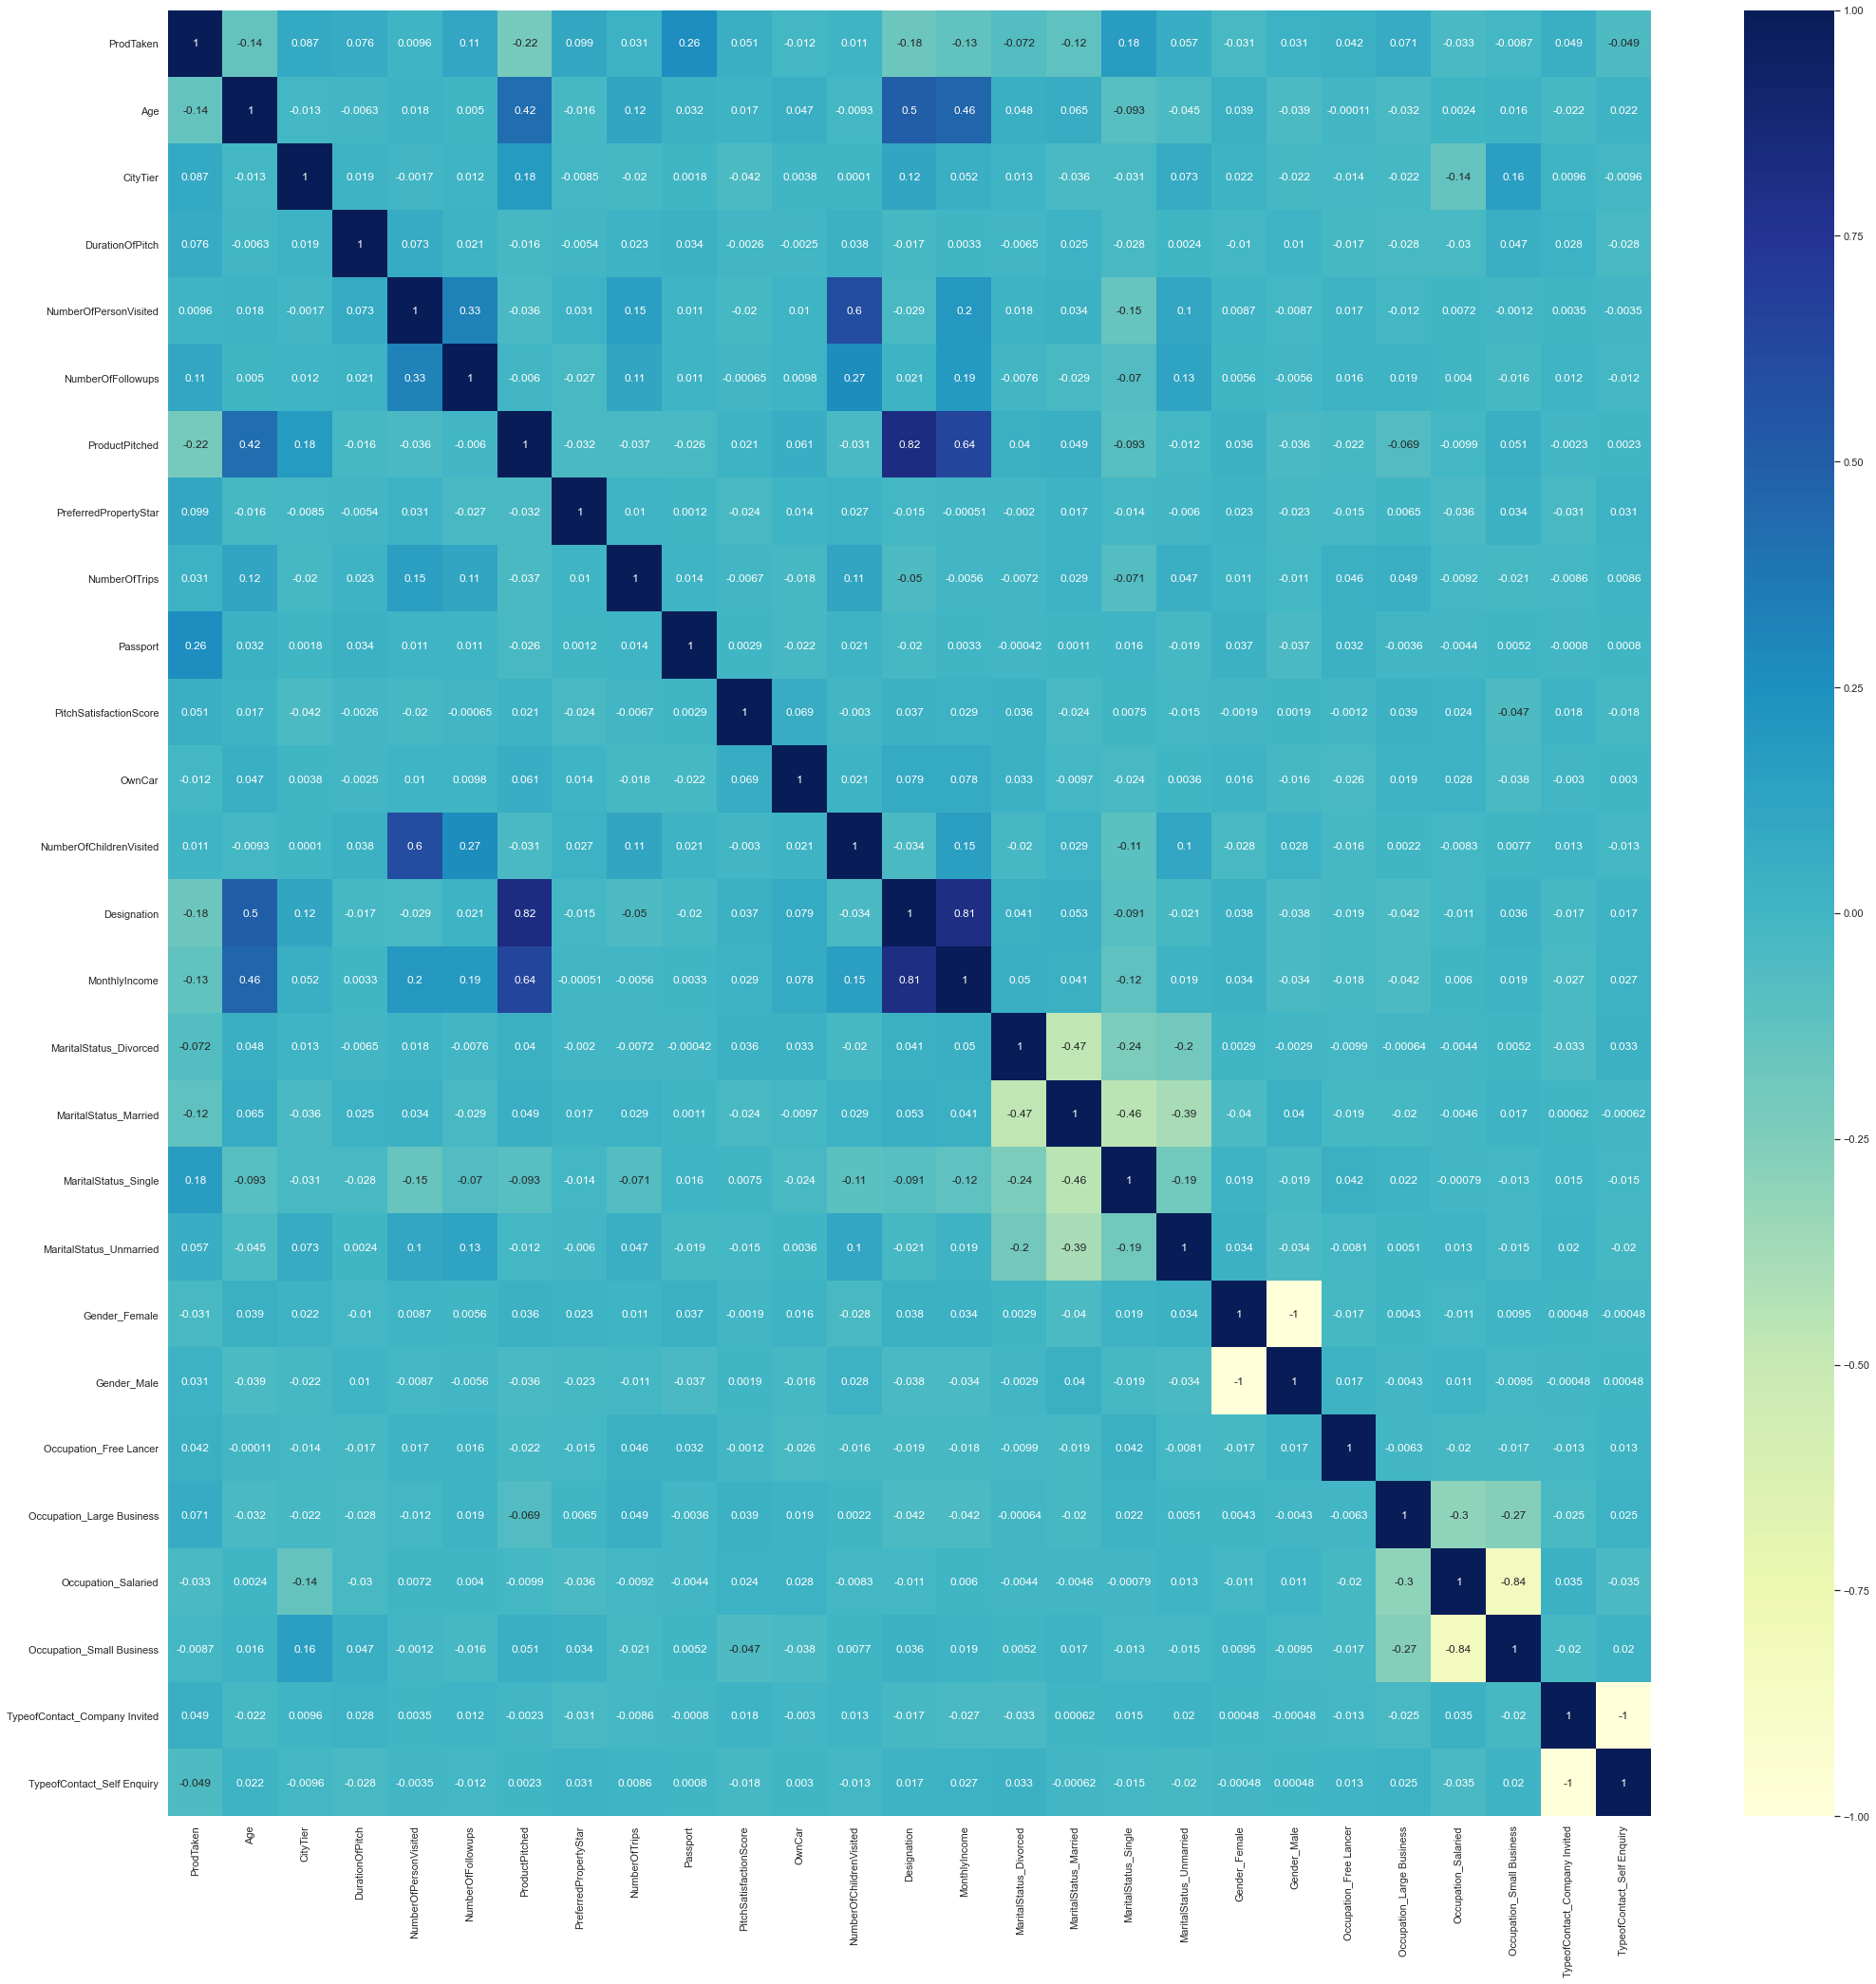

In [45]:
sns.set(rc={'figure.figsize':(35,35)})
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

Based on the correlations heatmap:
- The most likely people to take the product were those pitched the basic package, those with a passport, and executives.
- The people pitched the highest grade of packages were older people with higher incomes and higher designations in their current organization. It seems like certain designations, such as AVP, are only pitched certain packages, such as the super deluxe.
 - The occupations apparently didn't have any correlation with product pitched
- Most of the correlations on here are expected, such as monthly income and designation, monthly income and product pitched, number of person visited and number of children visited, age and designation/monthly income, etc.
- Interestingly, things like pitch satisfaction score and pitch duration were not very predictive of whether they would take the product

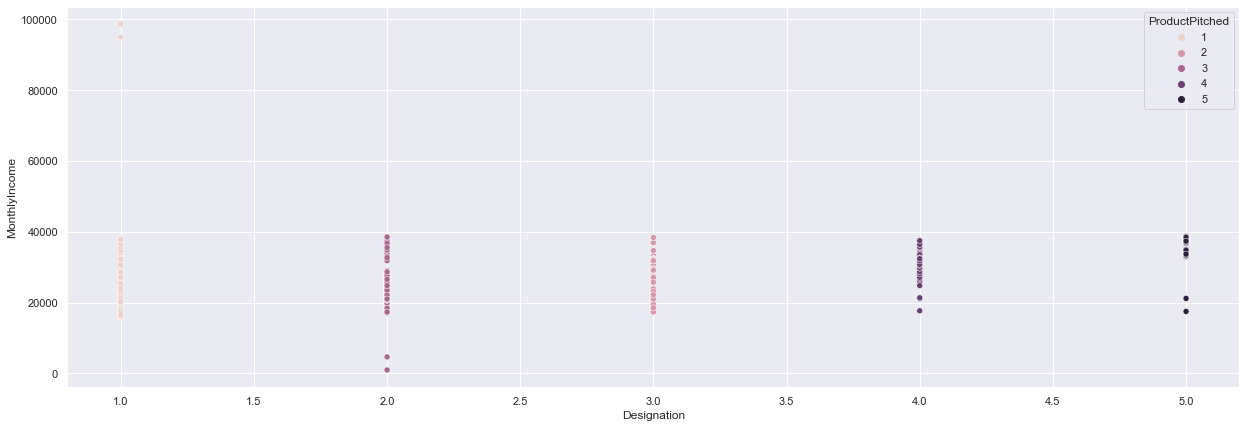

In [60]:
sns.set(rc={'figure.figsize':(21,7)})
sns.scatterplot(data=data, x="Designation",y='MonthlyIncome',hue='ProductPitched');

From this graph we can see that the product pitched depends almost entirely on their designation within their organization, as we saw earlier in the heatmap where the two were strongly correlated. Monthly income's correlation with the product pitched can probably be explained by those who are highly designated being on average higher earners. But it seems to me that the biggest factor in deciding which product is pitched is the customer's designation.

So far, the customer profile might look like this:
- Executives are offered the basic package
- Managers are offered the deluxe package
- Senior managers are offered the standard package
- AVPs are offered the super deluxe package
- VPs are offered the king package

What's interesting is that for some reason, senior managers are offered a better package than managers are

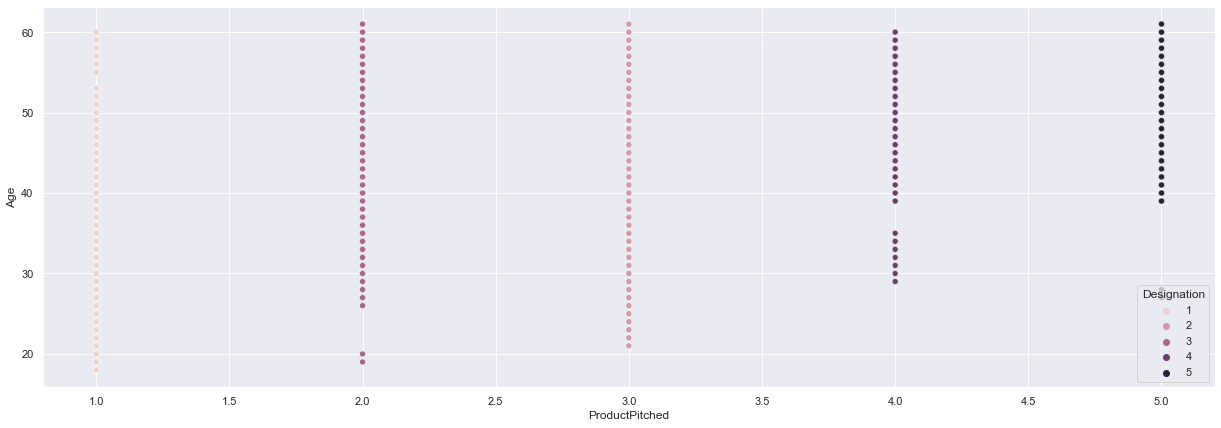

In [69]:
sns.set(rc={'figure.figsize':(21,7)})
sns.scatterplot(data=data, x="ProductPitched",y='Age', hue='Designation');

While those of higher designations tend to be older, people of all ages are pitched all products and so there doesn't seem to be a pattern here representing age and product pitched.

## Model Building

Function for model scores

In [90]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_model_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [76]:
# Dropping columns that are probably unnecessary 
data.drop(columns=['Gender_Female','TypeofContact_Self Enquiry'], inplace=True)

In [77]:
# Now to split the data 
X = data.drop('ProdTaken',axis=1)
y = data['ProdTaken']

In [78]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [79]:
X_train.shape, X_test.shape

((3421, 24), (1467, 24))

## Bagging

### Bagging Classifier

In [82]:
# Decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [91]:
get_model_score(bagging_estimator)

Accuracy on training set :  0.9944460684010523
Accuracy on test set :  0.8997955010224948
Recall on training set :  0.9711538461538461
Recall on test set :  0.5608108108108109
Precision on training set :  0.9983525535420099
Precision on test set :  0.907103825136612


[0.9944460684010523,
 0.8997955010224948,
 0.9711538461538461,
 0.5608108108108109,
 0.9983525535420099,
 0.907103825136612]

- I'd say this is an overfit based on the recall score. In this model, we identified only half of those who would have taken the product on the test data

In [92]:
bagging_estimator_tuned=BaggingClassifier(random_state=1)
# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

In [93]:
get_model_score(bagging_estimator_tuned)

Accuracy on training set :  0.9988307512423268
Accuracy on test set :  0.9161554192229039
Recall on training set :  0.9935897435897436
Recall on test set :  0.6114864864864865
Precision on training set :  1.0
Precision on test set :  0.9576719576719577


[0.9988307512423268,
 0.9161554192229039,
 0.9935897435897436,
 0.6114864864864865,
 1.0,
 0.9576719576719577]

- This is less of an overfit on the training data, but it is still overfitting. Scores have been imporoved across the board.

### Decision tree

In [108]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [109]:
get_model_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8991138377641446
Recall on training set :  1.0
Recall on test set :  0.6993243243243243
Precision on training set :  1.0
Precision on test set :  0.7781954887218046


[1.0, 0.8991138377641446, 1.0, 0.6993243243243243, 1.0, 0.7781954887218046]

- This is overfitting the training data, as to be expected on a decision tree without pruning it

In [126]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_impurity_decrease=0.001,
                       min_samples_leaf=5, random_state=1)

In [127]:
get_model_score(dtree_tuned)

Accuracy on training set :  0.8763519438760596
Accuracy on test set :  0.8350374914792092
Recall on training set :  0.5160256410256411
Recall on test set :  0.3952702702702703
Precision on training set :  0.7268623024830699
Precision on test set :  0.65


[0.8763519438760596,
 0.8350374914792092,
 0.5160256410256411,
 0.3952702702702703,
 0.7268623024830699,
 0.65]

- This parameter tuning made our model worse
- Let's look at the feature importance of the original tree since it outperformed the tuned one

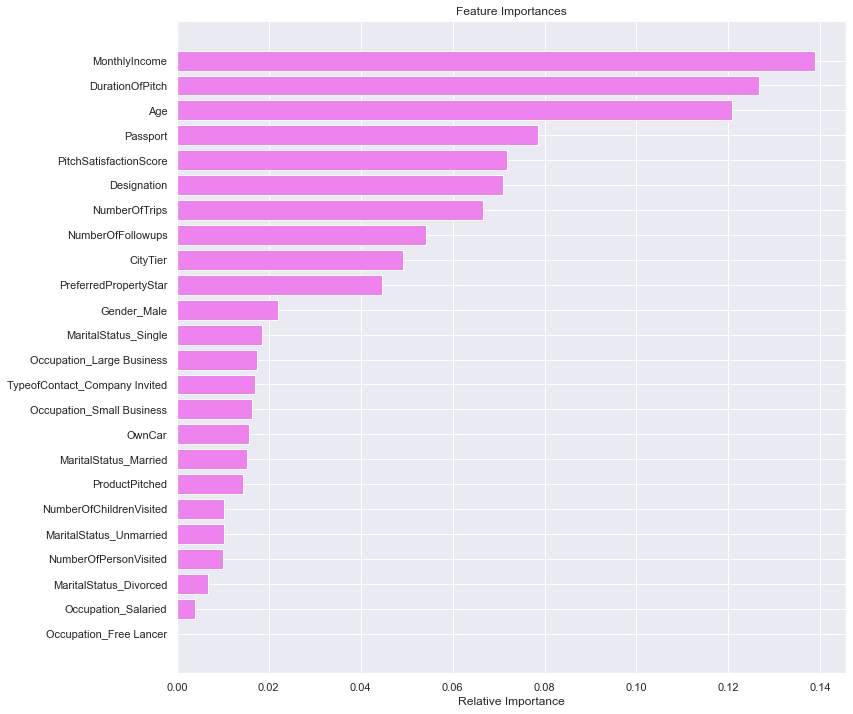

In [115]:
feature_names = X_train.columns
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- In this model, the features with the most importance were MonthlyIncome, DurationOfPitch, and Age.

### Random Forest

In [118]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [119]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_model_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.8984321745057942
Recall on training set :  1.0
Recall on test set :  0.5236486486486487
Precision on training set :  1.0
Precision on test set :  0.950920245398773


- This model is overfitting the training data. Need a model with more recall

In [131]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=80, random_state=1)

In [132]:
rf_tuned_score= get_model_score(rf_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9209270620313565
Recall on training set :  1.0
Recall on test set :  0.652027027027027
Precision on training set :  1.0
Precision on test set :  0.9368932038834952


- Best random forest model so far
- Now to see if adding weights can improve it

In [141]:
# Choose the type of classifier. 
rf_tuned_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  "class_weight": [{0: 0.3, 1: 0.7}],
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=None,
                       n_estimators=120, random_state=1)

In [142]:
rf_tuned_weighted_score= get_model_score(rf_tuned_weighted)

Accuracy on training set :  1.0
Accuracy on test set :  0.9195637355146558
Recall on training set :  1.0
Recall on test set :  0.6317567567567568
Precision on training set :  1.0
Precision on test set :  0.9540816326530612


- Adding weights to the model made it perform worse, so we'll continue with the rf_tuned model

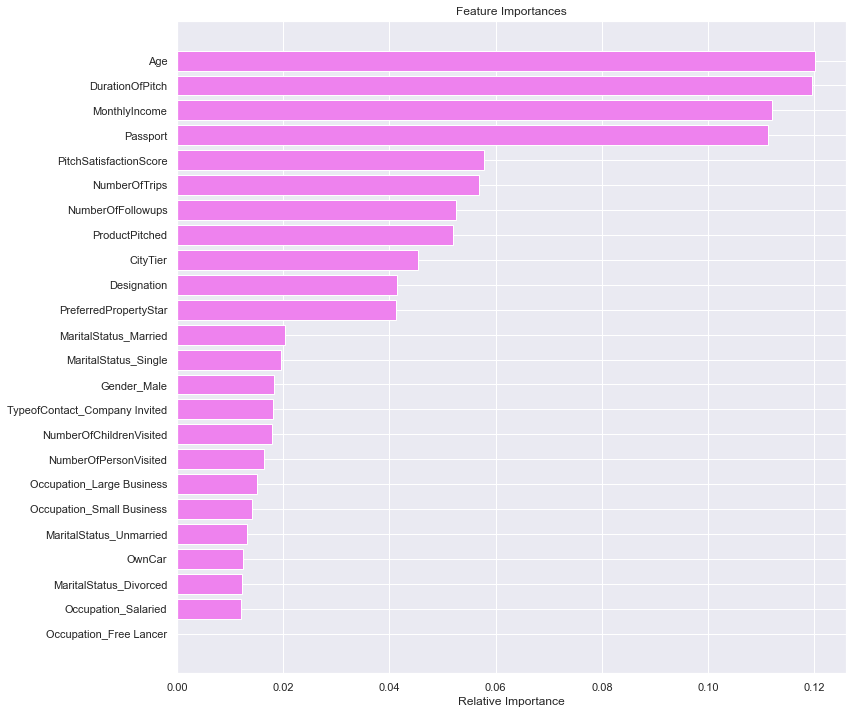

In [135]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The most important features in the random forest model are age, pitch duration, monthly income, and passport

## Boosting

### Adaboost

In [137]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [138]:
abc_score=get_model_score(abc)

Accuracy on training set :  0.8529669687225957
Accuracy on test set :  0.8391274710293115
Recall on training set :  0.3525641025641026
Recall on test set :  0.32432432432432434
Precision on training set :  0.6896551724137931
Precision on test set :  0.7272727272727273


- Performance of inital adaboost model is poor, especially recall
- On the plus side, it isn't overfitting as much as the bagging methods

In [139]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.7000000000000002, n_estimators=100,
                   random_state=1)

In [140]:
abc_tuned_score=get_model_score(abc_tuned)

Accuracy on training set :  0.9836305173925752
Accuracy on test set :  0.8786639400136332
Recall on training set :  0.9407051282051282
Recall on test set :  0.625
Precision on training set :  0.9686468646864687
Precision on test set :  0.7341269841269841


- Scores are better than before but it is now overfitting the data
- Test recall is still too low

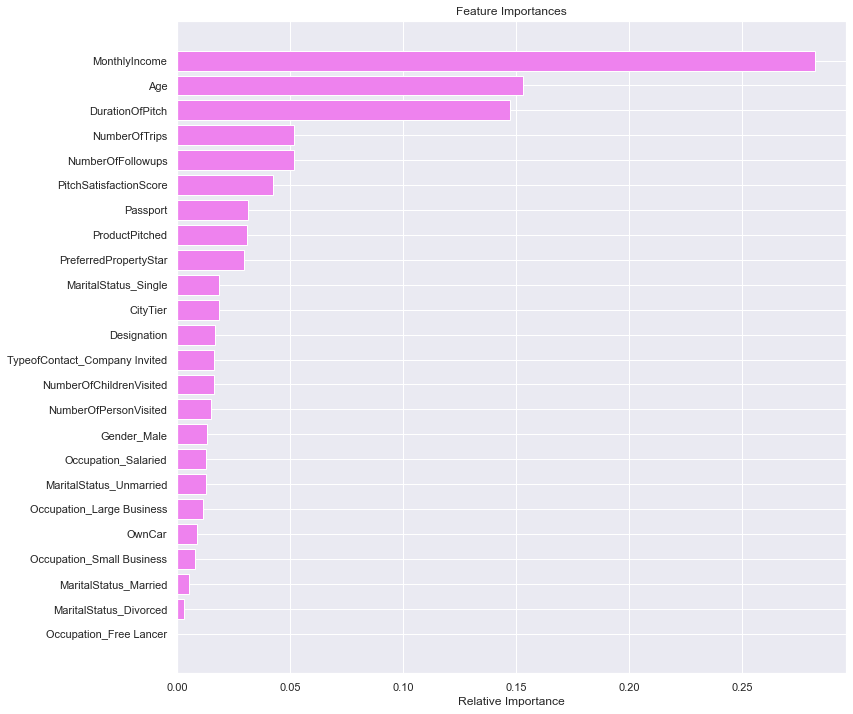

In [146]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- This model's most important feature is MonthlyIncome
- Age and DurationOfPitch are also relatively important

### Gradient Boosting

In [150]:
gbc=GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [151]:
gbc_score=get_model_score(gbc)

Accuracy on training set :  0.8848289973691903
Accuracy on test set :  0.8486707566462167
Recall on training set :  0.4583333333333333
Recall on test set :  0.3310810810810811
Precision on training set :  0.8362573099415205
Precision on test set :  0.8032786885245902


- This model is slightly better than adaboosting's initial performance

In [147]:
#Using adaboost classifier as the initial predictor
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [149]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_model_score(gbc_init)

Accuracy on training set :  0.8889213680210465
Accuracy on test set :  0.8493524199045671
Recall on training set :  0.47115384615384615
Recall on test set :  0.3344594594594595
Precision on training set :  0.8546511627906976
Precision on test set :  0.8048780487804879


- Using the adaboost classifier as the initial predictor did provide a slight improvement to the initial gradient boost score, so we will use it for the grid search

In [152]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1] +[None]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           n_estimators=250, random_state=1, subsample=0.8)

In [153]:
gbc_tuned_score=get_model_score(gbc_tuned)

Accuracy on training set :  0.9304296989184448
Accuracy on test set :  0.8807089297886844
Recall on training set :  0.6618589743589743
Recall on test set :  0.4864864864864865
Precision on training set :  0.9386363636363636
Precision on test set :  0.8622754491017964


- The best gradient boosting model thus far, but still out performed in terms of recall and overfitting by other models.

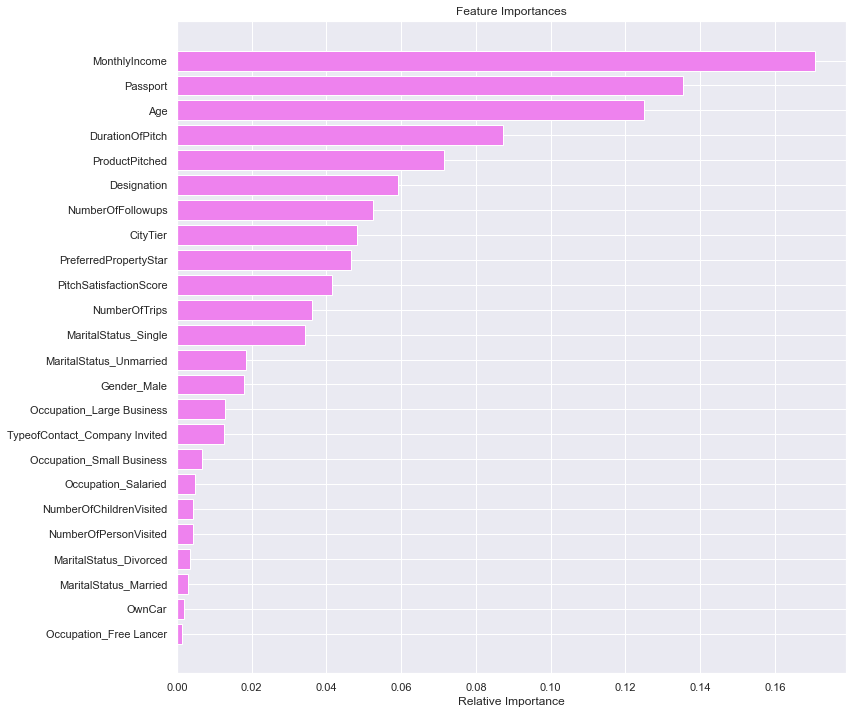

In [154]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The most important features of this model are monthly income, passport, and age

### XGBoost

In [159]:
xgb = XGBClassifier(random_state=1,verbosity=0)
xgb.fit(X_train,y_train)
# I was getting a warning when I ran this, verbosity set to 0 to stop these

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [160]:
xgb_score = get_model_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9277436946148603
Recall on training set :  1.0
Recall on test set :  0.6891891891891891
Precision on training set :  1.0
Precision on test set :  0.9357798165137615


- Data is overfit on training set but model scores are promising

In [161]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,verbosity=0)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=12, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [162]:
xgb_tuned_score=get_model_score(xgb_tuned)

Accuracy on training set :  0.9044139140602163
Accuracy on test set :  0.8493524199045671
Recall on training set :  0.9150641025641025
Recall on test set :  0.7297297297297297
Precision on training set :  0.6757396449704142
Precision on test set :  0.6050420168067226


- Data on training set fits better than the initial model
- Accuracy and Precision scores are worse, but recall score is better. This is fine, as recall is the measure that I would like to maximise so that we don't miss anyone that would otherwise take the product

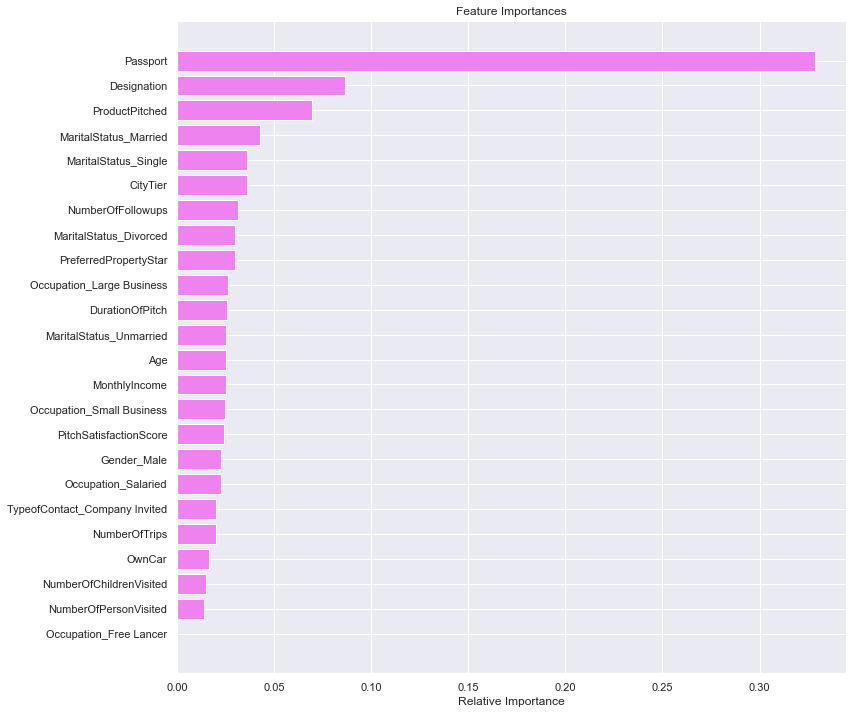

In [164]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The most important feature according to this model was Passport

### Stacking

First, I'd like to look at all the models to decide which ones to stack

In [165]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,dtree, dtree_tuned,rf_estimator,rf_tuned,abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [168]:
comparison_frame = pd.DataFrame({'Model':['Bagging Estimator','Tuned Bagging Estimator','Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging Estimator,0.99,0.90,0.97,0.56,1.00,0.91
1,Tuned Bagging Estimator,1.00,0.92,0.99,0.61,1.00,0.96
2,Decision Tree,1.00,0.90,1.00,0.70,1.00,0.78
3,Tuned Decision Tree,0.88,0.84,0.52,0.40,0.73,0.65
4,Random Forest,1.00,0.90,1.00,0.52,1.00,0.95
5,Tuned Random Forest,1.00,0.92,1.00,0.63,1.00,0.95
6,AdaBoost with default paramters,0.85,0.84,0.35,0.32,0.69,0.73
7,AdaBoost Tuned,0.98,0.88,0.94,0.62,0.97,0.73
8,Gradient Boosting with default parameters,0.88,0.85,0.46,0.33,0.84,0.80
9,Gradient Boosting with init=AdaBoost,0.89,0.85,0.47,0.33,0.85,0.80


- Aside from XGBoost tuned, Gradient boost tuned,Adaboost tuned, and Decision tree models seem to perform the best, without overfitting the data as much as the other models

In [169]:
estimators=[('Decision Tree', dtree),('Adaboost', abc_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [171]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Adaboost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=1.7000000000000002,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           n_estimators=250,
                                                           rando...
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                                 

In [172]:
stacking_estimator_score=get_model_score(stacking_estimator)

Accuracy on training set :  0.9742765273311897
Accuracy on test set :  0.9025221540558964
Recall on training set :  0.8814102564102564
Recall on test set :  0.6621621621621622
Precision on training set :  0.975177304964539
Precision on test set :  0.8200836820083682


### Comparing all models

In [173]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,dtree, dtree_tuned,rf_estimator,rf_tuned,abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned,stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [175]:
comparison_frame = pd.DataFrame({'Model':['Bagging Estimator','Tuned Bagging Estimator','Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned','stacking estimator'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging Estimator,0.99,0.90,0.97,0.56,1.00,0.91
1,Tuned Bagging Estimator,1.00,0.92,0.99,0.61,1.00,0.96
2,Decision Tree,1.00,0.90,1.00,0.70,1.00,0.78
3,Tuned Decision Tree,0.88,0.84,0.52,0.40,0.73,0.65
4,Random Forest,1.00,0.90,1.00,0.52,1.00,0.95
5,Tuned Random Forest,1.00,0.92,1.00,0.63,1.00,0.95
6,AdaBoost with default paramters,0.85,0.84,0.35,0.32,0.69,0.73
7,AdaBoost Tuned,0.98,0.88,0.94,0.62,0.97,0.73
8,Gradient Boosting with default parameters,0.88,0.85,0.46,0.33,0.84,0.80
9,Gradient Boosting with init=AdaBoost,0.89,0.85,0.47,0.33,0.85,0.80


- It would seem that the tuned XGBoost is the model. Its scores are the best and it doesn't overfit the data as bad as the other models do.
- Decision tree and stacking also tested pretty well

## Recommendations

- I was tasked with building a profile of someone who might be interested in the new Wellness Tourism package and building a model to predict potential customers of this package
- I believed false negatives to be the most costly error in this case, as I figured we wouldn't want to miss any potential customers. So I wanted a model that optimized its recall score. XGBoost tuned had the best recall score on the training set and was less overfit than the rest of the models. Its biggest issue is its precision score, meaning that we could be wasting money marketing to customers that won't buy the package.
- According to the tuned XGBoost model, the feature that best predicted whether someone would purchase a package was whether or not they owned a passport. A lot of other models marked features such as monthly income and age as important as well, which are correlated with designation, the tuned XGBoost's second most important feature. So I would mark those with high designations and whom own passports as people who would be most interested in the new package.
- One suggestion I would offer to the marketing team would be to offer coupons or discounts for people who own a passport